In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_excel("Inventory_updated3.xlsx")
data.head(5)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,year_month,net Sales,Temperature,Holiday
0,2020-01-01,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.00,26,0
1,2020-01-01,337,11,others,111,Maharashtra,1,49,7.44,2012-01,7.44,26,0
2,2020-01-01,423,12,others,111,Maharashtra,0,49,0.97,2012-01,0.00,26,0
3,2020-01-01,432,12,others,111,Maharashtra,0,49,4.97,2012-01,0.00,26,0
4,2020-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,2012-01,0.00,26,0


In [3]:
data["product_identifier"].unique()

array([  74,  337,  423,  432,  581,  611,  631,  659,  743,  797,  868,
        904,  926,  972,  973, 1054, 1135, 1173, 1190, 1196, 1228, 1240,
       1242, 1275, 1322, 1328, 1365, 1424, 1472, 1508, 1542, 1548, 1599,
       1629, 1672, 1694, 1727, 1753, 2294, 2332, 2492, 2768, 2794, 2818,
       2853, 2932, 2935, 3004, 3008, 3021], dtype=int64)

In [4]:
df = data[data["product_identifier"]==74]   # here we can change product id which we want to forecast
df.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,year_month,net Sales,Temperature,Holiday
0,2020-01-01,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.0,26,0
50,2020-01-01,74,11,others,112,Maharashtra,0,49,2.94,2012-01,0.0,26,0
100,2020-01-01,74,11,others,113,Maharashtra,0,49,2.94,2012-01,0.0,26,0
150,2020-01-01,74,11,others,114,Maharashtra,0,49,2.94,2012-01,0.0,26,0
200,2020-01-02,74,11,others,111,Maharashtra,0,49,2.94,2012-01,0.0,25,0


In [5]:
gb = df.groupby(["date"])["net Sales"].sum().reset_index().sort_values(by="date")
gb

,date,net Sales
0,2020-01-01,0.00
1,2020-01-02,2.94
2,2020-01-03,5.88
3,2020-01-04,0.00
4,2020-01-05,8.82
...,...,...
785,2022-02-24,0.00
786,2022-02-25,0.00
787,2022-02-26,0.00
788,2022-02-27,0.00


In [6]:
gb.rename(columns={"date":"ds","net Sales":"y"},inplace=True)
gb.head()

,ds,y
0,2020-01-01,0.00
1,2020-01-02,2.94
2,2020-01-03,5.88
3,2020-01-04,0.00
4,2020-01-05,8.82


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from prophet import Prophet
import plotly.express as px
import plotly.figure_factory as ff

import warnings
from soupsieve import select
warnings.filterwarnings('ignore')

# Shows all columns 
pd.set_option("display.max_columns", None)

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
m = Prophet(changepoint_prior_scale=0.01).fit(gb)
future = m.make_future_dataframe(periods=30, freq='D')
pred = m.predict(future)

18:09:20 - cmdstanpy - INFO - Chain [1] start processing
18:09:21 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
pred.head()   # sales prediction for 30 days

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,6.46689,-0.69642,14.68250,6.46689,6.46689,0.23322,0.23322,0.23322,1.87153,1.87153,1.87153,-1.63831,-1.63831,-1.63831,0.00000,0.00000,0.00000,6.70010
1,2020-01-02,6.46556,-1.79970,12.04479,6.46556,6.46556,-1.15357,-1.15357,-1.15357,0.39749,0.39749,0.39749,-1.55106,-1.55106,-1.55106,0.00000,0.00000,0.00000,5.31199
2,2020-01-03,6.46423,-3.46374,11.62570,6.46423,6.46423,-2.47399,-2.47399,-2.47399,-1.01585,-1.01585,-1.01585,-1.45813,-1.45813,-1.45813,0.00000,0.00000,0.00000,3.99024
3,2020-01-04,6.46290,-3.04527,11.52174,6.46290,6.46290,-2.04391,-2.04391,-2.04391,-0.68311,-0.68311,-0.68311,-1.36080,-1.36080,-1.36080,0.00000,0.00000,0.00000,4.41899
4,2020-01-05,6.46157,-3.36367,11.64767,6.46157,6.46157,-2.39500,-2.39500,-2.39500,-1.13448,-1.13448,-1.13448,-1.26052,-1.26052,-1.26052,0.00000,0.00000,0.00000,4.06657


### Dataframe for plotting

In [13]:
try_gb = gb.copy()
try_gb["yhat_lower"] = try_gb["y"]
try_gb["yhat_upper"] = try_gb["y"]
try_gb.rename(columns={"y":"yhat"},inplace=True)

In [14]:
a = [try_gb,pred[["ds","yhat","yhat_lower","yhat_upper"]]]
pred_new = pd.concat(a).reset_index()

In [15]:
past = pred_new["ds"].iloc[-80:-30]
future = pred_new["ds"].tail(31)

past_s = pred_new["yhat"].iloc[-80:-30]
future_s = pred_new["yhat"].tail(31)

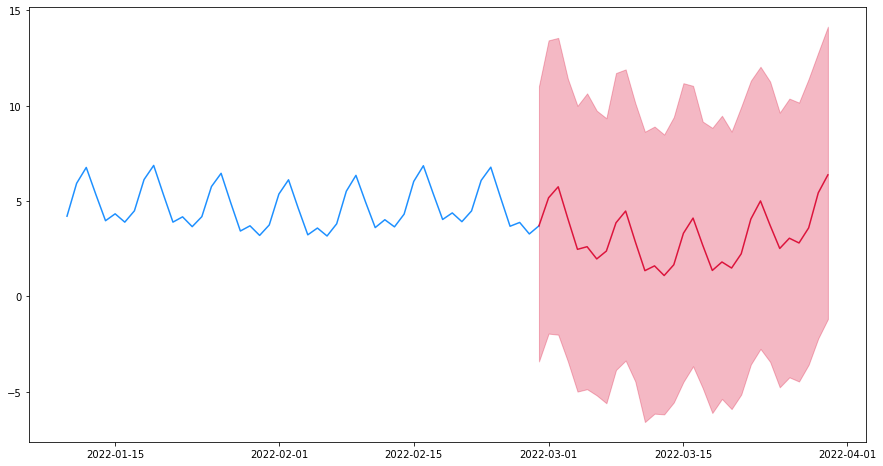

In [18]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(past, past_s, color='dodgerblue')
ax.plot(future, future_s, color='crimson')
ax.fill_between(future, pred_new["yhat_lower"].tail(31), pred_new["yhat_upper"].tail(31), color='crimson', alpha=0.3)
    
#st.header("Net Sales Forcasting for "+name)